# **Bag of Words Meets Bags of Popcorn**
Predict which Reviews is positive and which is negative.

# Project Overview

This tutorial will help you get started with Word2Vec for natural language processing. It has two goals: 

* Basic Natural Language Processing: Part 1 of this tutorial is intended for beginners and covers basic natural language processing techniques, which are needed for later parts of the tutorial.

* Deep Learning for Text Understanding: In Parts 2 and 3, we delve into how to train a model using Word2Vec and how to use the resulting word vectors for sentiment analysis.

Since deep learning is a rapidly evolving field, large amounts of the work has not yet been published, or exists only as academic papers. Part 3 of the tutorial is more exploratory than prescriptive -- we experiment with several ways of using Word2Vec rather than giving you a recipe for using the output.

To achieve these goals, we rely on an IMDB sentiment analysis data set, which has 100,000 multi-paragraph movie reviews, both positive and negative. 

# The Problem
The problem to be solved by this project is how to identify which Reviews as a positive sentiment and which is not .
This project will build a machine learning model to predict which Reviews has a positive sentiment and which one’s aren’t.

In [ ]:
#Importing the required libraries to read,visualize and model the givn dataset files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")
import re
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn import model_selection

from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from platform import python_version
print (python_version())
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Reading the data

In [ ]:
df_train = pd.read_csv('../input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip', delimiter="\t")
df_train.head()

we will be removing the id column bc it is useless

In [ ]:
df_train = df_train.drop(['id'], axis=1)
df_train.head()

In [ ]:
df_test =pd.read_csv("../input/word2vec-nlp-tutorial/testData.tsv.zip",header=0, delimiter="\t", quoting=3)
df_test.head()

In [ ]:
print("-"*50)
print('Shape of the dataframe:',df_train.shape)
print("Number of records in train data set:",df_train.shape[0])
print("Information of the dataset:")
df_train.info()
print("-"*50)
print("First 5 records of the dataset:")
df_train.head()
print("-"*50)

# Class distribution
## lets see the class distibution for 0 and 1


In [ ]:
print('Sentiment of 0 is {} % of total'.format(round(df_train['sentiment'].value_counts()[0]/len(df_train['sentiment'])*100)))
print('Sentiment of 1 is {} % of total'.format(round(df_train['sentiment'].value_counts()[1]/len(df_train['sentiment'])*100)))
x=df_train.sentiment.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

# Data Preprocessing

## Data cleaning 
Before starting any NLP project, text data needs to be pre-processed to convert it into in a consistent format.Text will be cleaned, tokneized and converted into a matrix.

Some of the basic text pre-processing techniques includes:

Make text all lower or uppercase
Algorithms does not treat the same word different in different cases.

### Removing Noise
Everything in the text that isn’t a standard number or letter i.e. Punctuation, Numerical values,etc.

### Tokenization
Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e. words.Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.

### Stopword Removal
Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words

### Stemming
Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form. Example if we were to stem the following words: “Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.

### Lemmatization
A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. Examples of Lemmatization are that “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.

In [ ]:
import re
import string
# Create a function to clean the text

def clean_text(text):

    '''
    Input- 'text' to be cleaned
       
       Output- Convert input 'text' to lowercase,remove square brackets,links,punctuation
       and words containing numbers. Return clean text.
    
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# Lets apply the clean_text function to both test and training datasets copies
df_train1=df_train.copy()
df_test1=df_test.copy()
df_train1['review'] = df_train1['review'].apply(lambda x: clean_text(x))
df_test1['review'] = df_test1['review'].apply(lambda x: clean_text(x))

In [ ]:
#Lets look cleaned text data
def text_after_preprocess(before_text,after_text):
    
    '''
    Input- before_text=text column before cleanup
              after_text= text column after cleanup
       Output- print before and after text to compare how it looks after cleanup
       
    '''
    print('-'*60)
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('-'*60)
    print('Text after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [ ]:
text_after_preprocess(df_train.review,df_train1.review)


### Tokenization
Tokenization is a process which splits an input text into tokens and the tokens can be a word, sentence, paragraph etc.

Following code will show how tokenization of text works:

In [ ]:
import nltk

# Example how tokenization of text works
text = "Heard about #earthquake is different cities, stay safe everyone."
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')
print("-"*100)
print("Example Text: ",text)
print("-"*100)
print("Tokenization by whitespace:- ",tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer:- ",tokenizer2.tokenize(text))
print("Tokenization by punctuation:- ",tokenizer3.tokenize(text))
print("Tokenization by regular expression:- ",tokenizer4.tokenize(text))

In [ ]:
# Lets Tokenize the training and the test dataset copies with RegEx tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_train1['review'] = df_train1['review'].apply(lambda x: tokenizer.tokenize(x))

df_test1['review'] = df_test1['review'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
#Lets checy tokenized text
df_train1['review'].head()

### Stopwords Removal
Now, let's get rid of the stopwords i.e words which occur very frequently and have possible value like a, an, the, are etc.

In [ ]:
df_train1['review'].head()

### Stemming and Lemmatization
**Stemming**: Removing and replacing suffixes to get to the root form of the word, which is called the stem for instance cats - cat, wolves - wolv


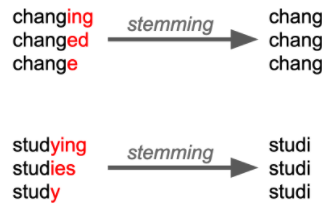]


**Lemmatization** : Returns the base or dictionary form of a word, which is known as the lemma

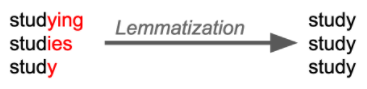]

It is important to note that stemming and lemmatization sometimes doesnt necessarily improve results as sometimes we dont want to trim words rather preserve their original form.
Its usage from problem to problem and for this problem it wouldnt be good idea to use it.

In [ ]:
# Stemming and Lemmatization examples
text =  "ran deduced dogs talking studies"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# Stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# Lemmatizer
lemmatizer=nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

In [ ]:
# Lets combine text after processing it
def combine_text(text):
    
    '''
    Input-text= list cleand and tokenized text
    Output- Takes a list of text and returns combined one large chunk of text.
    
    '''
    all_text = ' '.join(text)
    return all_text

In [ ]:
df_train1['review'] = df_train1['review'].apply(lambda x : combine_text(x))
df_test1['review'] = df_test1['review'].apply(lambda x : combine_text(x))

## Vectorization of text
Pre-process text needs to be transformed into a vetor matrix of numbers before a machine learning model can undertsand it and learn from it.This can be done by a number of tecniques:

### Bag of Words
The bag of words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
Why is it is called a “bag” of words? Its called bag of words because any information about the order or structure of words in the document is discarded and the model is only concerned with whether the known words occur in the document, not where they occur in the document.

Bag of Words - Countvectorizer Features¶
Countvectorizer converts a collection of text documents to a matrix of token counts. It is important to note that CountVectorizer comes with a lot of options to automatically do preprocessing, tokenization, and stop word removal. However, all the pre-processing of the text has already been performed by creating a function.Only vanilla version of Countvectorizer will be used.

** # Download pretrained word2vec model from Google **

This tool provides an efficient implementation of the continuous bag-of-words and skip-gram architectures for computing vector representations of words. These representations can be subsequently used in many natural language processing

In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz

In [ ]:
""" Load and index the GoogleNews word2vec file """
from gensim.models import KeyedVectors


print('Indexing word vectors')
word2vec = KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin", binary=True)
print('Found %s word vectors of word2vec' % len(word2vec.key_to_index))


In [ ]:
""" Compute feature representation for each text/tweet: mean Word2vec """
mV = []
for sentence in df_train1['review'].values:
    #print(sentence)
    vectors = []
    for x in sentence.split(' '):
        try:
            v = word2vec[x]
            vectors.append(v)
        except:
            i = False # meaningless
            #print("%s not found"%x)
    vectors = np.array(vectors)
    # We use the mean of the words' vectors, 
    # but inner-product might be a more widely accepted solution
    meanw2v = np.mean(vectors,axis=0)
    mV.append(meanw2v)
mV = np.array(mV)
print(mV.shape)

In [ ]:
""" The data is initially imbalanced. We want to train our models with equal positive and negative classes. The imblearn pacakge
has a number of options to deal with imbalance. We use the simple undersampling."""
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

Y = [[int(sent=="1")] for sent in np.array(df_train1['sentiment'])]
X = np.copy(mV)

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, Y)
print("Positive and negative samples (after random undersampling):")
print(X_resampled.shape,y_resampled.shape)
print(sorted(Counter(y_resampled.T[0]).items()))

In [ ]:
""" Train/test split and classification"""
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled.ravel(), test_size = 0.3, 
                                                    random_state = 42, stratify=y_resampled, shuffle=True)
print(X_train.shape,y_train.shape)
print("Negative and positive examples in training:",sorted(Counter(y_train.tolist()).items()))
print(X_test.shape,y_test.shape)
print("Negative and positive examples in testing:",sorted(Counter(y_test.tolist()).items()))

""" The typical knn """
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("k-NN Score:",knn.score(X_test, y_test))

""" RandomForestClassifier """
from sklearn.ensemble import RandomForestClassifier
import math
MAX_FEAT = int(math.sqrt(X_train.shape[1])) # this is a rule of thumb
clf = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators = 40, max_features = MAX_FEAT)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("RF Score:",clf.score(X_test, y_test))

""" Gradient Boosting """
from sklearn.ensemble import GradientBoostingClassifier
gbrt =  GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train,y_train)
y_pred = gbrt.predict(X_test)
print("GBRT Score:", gbrt.score(X_test, y_test))

""" Vanilla MLP """
from sklearn.neural_network import MLPClassifier
for a in [0.0001,0.01,0.1,1]:
    mlp = MLPClassifier(solver = "adam",activation="relu", random_state = 0, 
                        hidden_layer_sizes = [100,100], alpha = a)
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_test)
    print("MLP Score:",mlp.score(X_test, y_test), " alpha:",a)